In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
generator = image_util.ImageDataProvider(search_path='F:\\MOY_PhD_DATA_LOCAL\\2017_watsen\\data\\frames\\*')

Number of files used: 1055


In [5]:
x_test, y_test = generator(40)

In [6]:
np.sum(y_test)

2176370.0

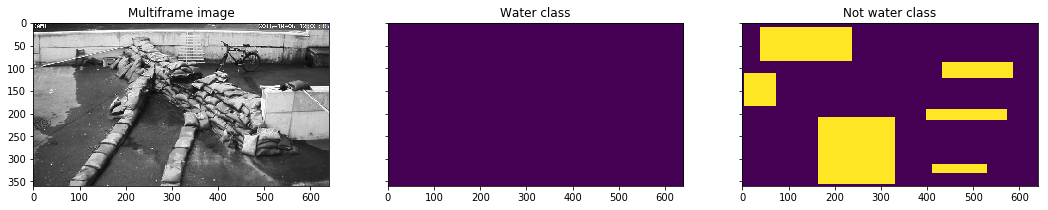

In [7]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(18,3))
ax[0].set_title('Multiframe image')
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].set_title('Water class')
ax[1].imshow(y_test[1,...,0], aspect="auto")
ax[2].set_title('Not water class')
ax[2].imshow(y_test[0,...,1], aspect="auto")

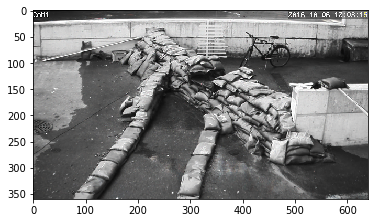

In [8]:
plt.imshow(x_test[0,...])

In [9]:
net = unet.Unet(channels=3, n_class=2, layers=5, features_root=16, cost_kwargs=dict(class_weights=[5,1]))

2017-08-02 10:17:12,612 Layers 5, features 16, filter size 3x3, pool size: 2x2


In [10]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [11]:
path = trainer.train(generator, "./unet_trained", training_iters=100, epochs=20, display_step=50)

2017-08-02 10:17:22,484 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-08-02 10:17:23,326 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained'
2017-08-02 10:17:23,845 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-08-02 10:17:23,851 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained'
2017-08-02 10:17:28,438 Verification error= 83.1%, loss= 0.1518
2017-08-02 10:17:32,360 Start optimization
2017-08-02 10:17:34,149 Iter 0, Minibatch Loss= 0.1640, Training Accuracy= 0.9167, Minibatch error= 83.1%
2017-08-02 10:17:42,763 Iter 50, Minibatch Loss= 0.0450, Training Accuracy= 1.0000, Minibatch error= 79.4%
2017-08-02 10:17:51,516 Epoch 0, Average loss: 0.0619, learning rate: 0.2000
2017-08-02 10:17:51,610 Verification error= 83.1%, loss= 0.3902
2017-08-02 10:17:56,481

In [12]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-08-02 10:30:17,293 Restoring parameters from ./unet_trained/model.cpkt
2017-08-02 10:30:19,347 Model restored from file: ./unet_trained/model.cpkt


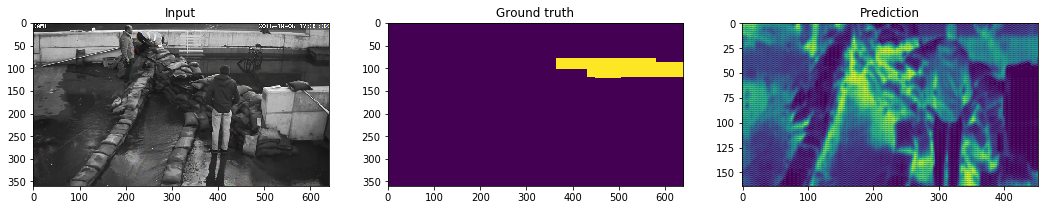

In [14]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18,3))
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
mask = prediction[0,...,0] 
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")